# ODEyssey

Here you can find examples for each function. Note that you can always type help(ode.FunctionName) to get instructions on how to use it.

First we import the package

In [ ]:
import ODEyssey as ode

### Timeseries

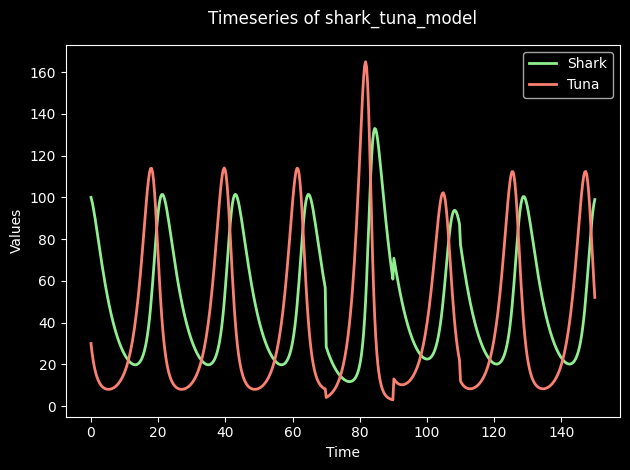

In [4]:
# Initial conditions
Shark = 100         # Initial amount of shark
Tuna = 30           # Initial amount of tuna
intital_state = [Shark, Tuna]  # The initial state vector

# Define the change equations
def shark_tuna_model(y, t):
    Shark, Tuna = y
    delta_shark = m * beta * Shark * Tuna - d * Shark  # Predation rate * interaction - natural shark death rate
    delta_tuna = b * Tuna - beta * Shark * Tuna  # Tuna growth - predation rate * interaction
    return [delta_shark, delta_tuna]

# Parameters (adjust these for different dynamics)
b = 0.5   # Tuna birth rate
d = 0.2 # Shark death rate
beta = 0.01  # Probability shark catches a tuna (frequency of successful shark-tuna encounters)
m = 0.5 # Amount of food, so in this case the size of the tuna

# Interventions
interventions = [
    {'time': 70, 'type': 'multiply', 'magnitude': 0.5},
    {'time': 90, 'type': 'add', 'magnitude': 10},
    {'time': 110, 'type': 'subtract', 'magnitude': 10},
]

# Plotting the timeseries with interventions
ode.timeseries(shark_tuna_model, 0, 150, 500, intital_state, interventions, line_colors=['lightgreen', 'salmon'])

### Euler's method

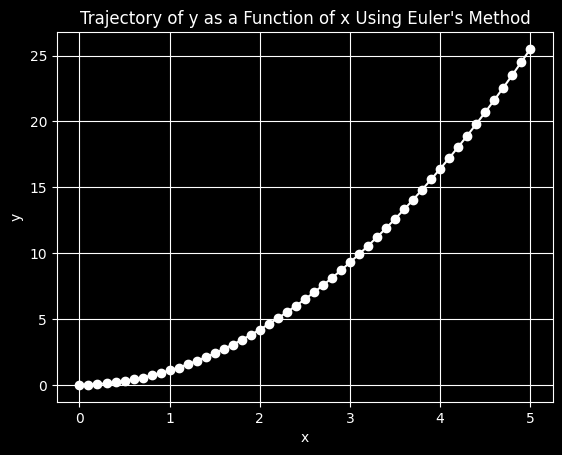

In [5]:
def equation(x):
    return x**2

def differential_equation(x):
    return 2*x

x_values, y_values = ode.eulers_method(0, 5, 0.1, equation, differential_equation, plot_trajectory = True)

### 2D vector field

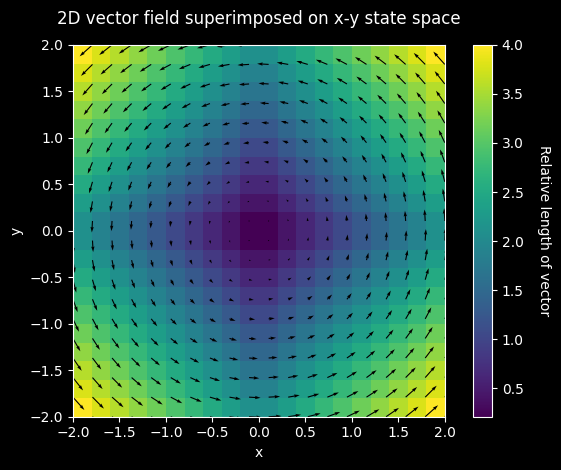

In [6]:
def equations(x , y):
    u = -y
    v = x
    return u, v

ode.plot_vector_field(equations, (-2, 2), (-2, 2))

### 3D vector field

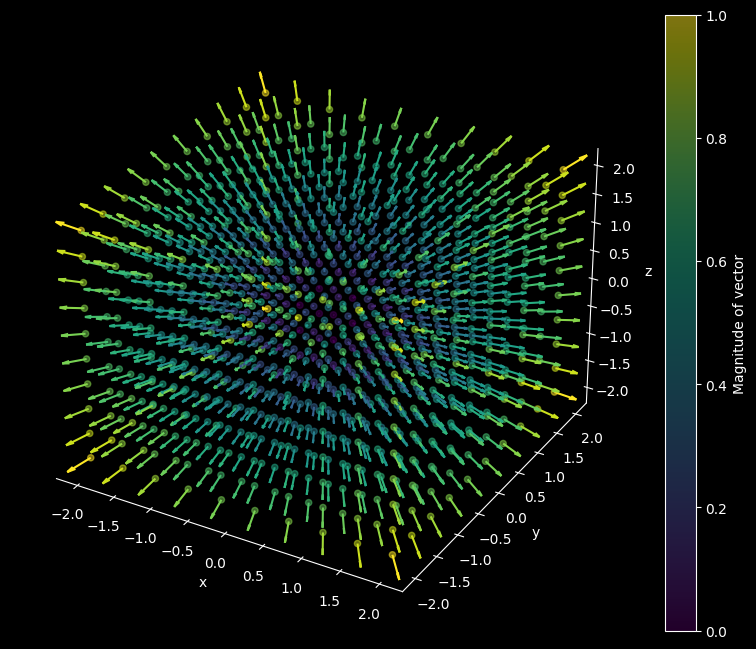

In [7]:
def equations(x, y, z):
    u = x
    v = y
    w = z
    return u, v, w

ode.plot_3d_vector_field(equations, (-2, 2), (-2, 2), (-2, 2), vector_scale_factor=0.5)

### 2D trajectory

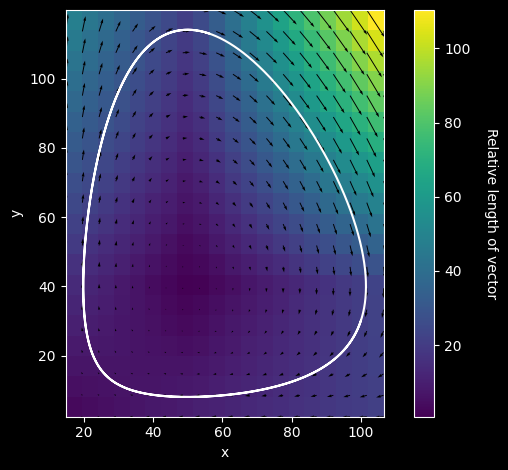

In [ ]:
# Directional vectors
def equations(state, t, m, d, beta, b):
    Shark, Tuna = state
    u = m * beta * Shark * Tuna - d * Shark
    v = b * Tuna - beta * Shark * Tuna
    return[u, v]

# Parameters (adjust these for different dynamics)
b = 0.5
d = 0.2
beta = 0.01
m = 0.5

p = (m, d, beta, b)

initial_state = [100, 30] # Starting points for x and y, in this case Shark and Tuna populations

ode.plot_trajectories(equations, 0, 40, 0.01, params=p, gradient_trajectory=False)

### 3D trajectory

Turned of gradient trajectory, cannot have both colour and gradient.


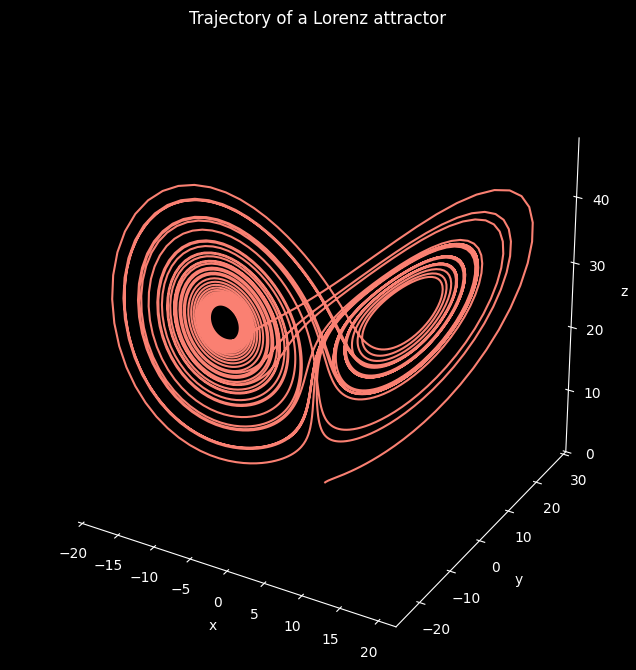

In [15]:
def lorenz(state, t, sigma, beta, rho):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

# Parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

p = (sigma, beta, rho)

# Starting position
y0 = [1.0, 1.0, 1.0]

ode.plot_trajectories_3d(lorenz, 0, 40, 0.01, initial_state=y0, params=p, gradient_trajectory=False, vector_field=False, title='Trajectory of a Lorenz attractor')

### Riemann sum

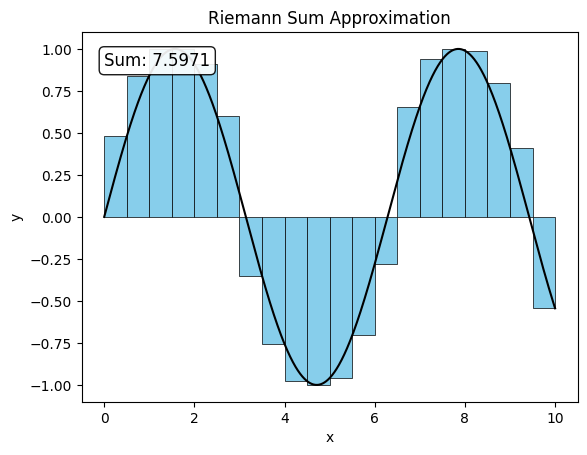

7.597064250821055


In [16]:
# Example usage
def equation(i):
    return np.sin(i)

result = ode.riemann(0, 10, 0.5, equation, method='upper', dark_mode=False)
print(result)

## More to come